<a href="https://colab.research.google.com/github/nithishkumarst17/data-science-project/blob/main/Smart_Weather_Forecast_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SMART WEATHER FORECAST

                     datetime  temperature  humidity  wind_kmh  rain_prob
0  2025-09-21 16:02:34.126082         23.1      67.9      13.1        0.0
1  2025-09-21 17:02:34.126082         25.6      74.7      15.2        0.0
2  2025-09-21 18:02:34.126082         26.1      74.2      15.9        0.0
3  2025-09-21 19:02:34.126082         25.4      66.0      13.6        0.0
4  2025-09-21 20:02:34.126082         25.8      68.7      18.3        0.0
5  2025-09-21 21:02:34.126082         24.8      76.7       8.9        0.0
6  2025-09-21 22:02:34.126082         27.3      78.2      11.6        1.8
7  2025-09-21 23:02:34.126082         28.4      65.2      12.2        0.0
8  2025-09-22 00:02:34.126082         28.9      80.2      14.0       40.6
9  2025-09-22 01:02:34.126082         31.0      80.5      18.1       44.7
10 2025-09-22 02:02:34.126082         32.0      73.5      13.7       66.1
11 2025-09-22 03:02:34.126082         32.4      79.7      15.1       74.1
12 2025-09-22 04:02:34.126082         

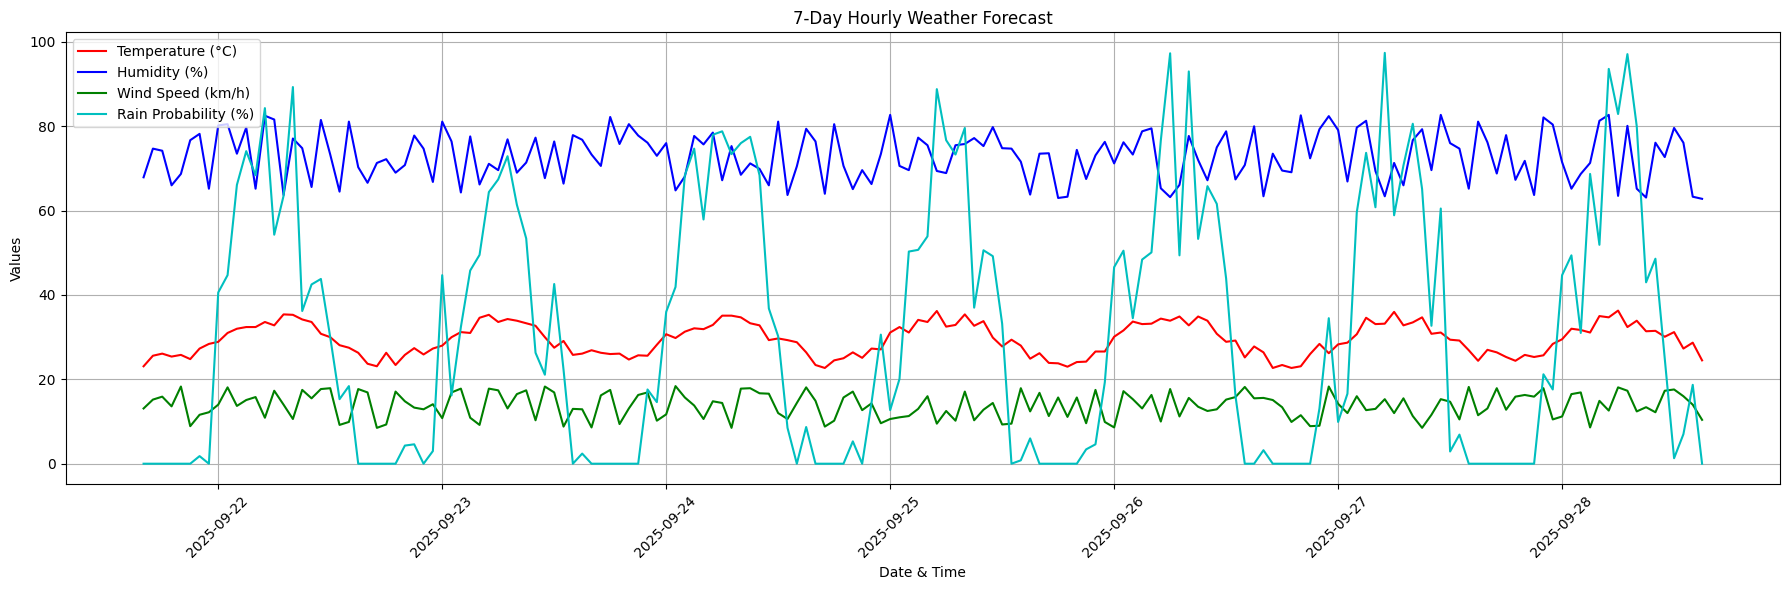

            Temp_Avg  Temp_Min  Temp_Max  Humidity_Avg  Wind_Avg  RainProb_Avg
date                                                                          
2025-09-21      25.8      23.1      28.4          71.4      13.6           0.2
2025-09-22      29.5      23.1      35.4          73.5      14.2          32.6
2025-09-23      29.4      24.7      35.3          74.0      14.0          27.3
2025-09-24      29.4      22.7      35.1          71.6      14.0          36.1
2025-09-25      29.3      23.0      36.2          72.8      12.7          29.6
2025-09-26      29.5      22.7      34.9          73.1      13.8          34.9
2025-09-27      29.4      24.4      36.0          73.8      13.9          30.6
2025-09-28      31.3      24.5      36.3          71.4      14.3          46.4


In [14]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import logging

logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

API_KEY = "7104194432c656a6607a91d930c7998a"
LAT, LON = 12.5266, 78.2150
NUM_HOURS = 7 * 24
BASE_URL = "https://api.openweathermap.org/data/2.5/onecall"

def fetch_weather_api(lat, lon):
    try:
        url = f"{BASE_URL}?lat={lat}&lon={lon}&exclude=minutely,alerts&appid={API_KEY}&units=metric"
        response = requests.get(url, timeout=5)
        response.raise_for_status()
        data = response.json()

        current = data.get("current")
        if not current:
            raise ValueError("Current weather data missing")

        hourly_data = data.get("hourly", [])[:NUM_HOURS]
        forecast = []
        for hour in hourly_data:
            dt = datetime.fromtimestamp(hour["dt"])
            forecast.append({
                "datetime": dt,
                "temperature": hour.get("temp", np.nan),
                "humidity": hour.get("humidity", np.nan),
                "wind_kmh": hour.get("wind_speed", np.nan),
                "rain_prob": hour.get("pop", 0) * 100
            })
        logging.info("Weather data fetched from API successfully")
        return pd.DataFrame(forecast)

    except Exception as e:
        logging.warning(f"API fetch failed: {e}")
        return None

def generate_random_weather(num_hours):
    now = datetime.now()
    forecast = []

    temp_base = np.random.uniform(25, 35)
    humidity_base = np.random.uniform(50, 80)
    wind_base = np.random.uniform(5, 15)

    for i in range(num_hours):
        dt = now + timedelta(hours=i+1)
        hour_of_day = dt.hour
        temp_variation = 5 * np.sin((hour_of_day / 24) * 2 * np.pi)
        temp = temp_base + temp_variation + np.random.uniform(-2, 2)
        humidity = humidity_base + np.random.uniform(-10, 10)
        wind = wind_base + np.random.uniform(-5, 5)
        rain_prob = np.clip(50 * np.sin((hour_of_day / 24) * 2 * np.pi) + np.random.uniform(0, 50), 0, 100)

        forecast.append({
            "datetime": dt,
            "temperature": round(temp, 1),
            "humidity": round(humidity, 1),
            "wind_kmh": round(wind, 1),
            "rain_prob": round(rain_prob, 1)
        })

    logging.info("Random weather data generated")
    return pd.DataFrame(forecast)

def plot_hourly_forecast(df):
    plt.figure(figsize=(18,6))
    plt.plot(df["datetime"], df["temperature"], 'r-', label="Temperature (°C)")
    plt.plot(df["datetime"], df["humidity"], 'b-', label="Humidity (%)")
    plt.plot(df["datetime"], df["wind_kmh"], 'g-', label="Wind Speed (km/h)")
    plt.plot(df["datetime"], df["rain_prob"], 'c-', label="Rain Probability (%)")
    plt.xlabel("Date & Time")
    plt.ylabel("Values")
    plt.title("7-Day Hourly Weather Forecast")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def compute_daily_summary(df):
    df["date"] = df["datetime"].dt.date
    summary = df.groupby("date").agg({
        "temperature": ["mean", "min", "max"],
        "humidity": "mean",
        "wind_kmh": "mean",
        "rain_prob": "mean"
    }).round(1)
    summary.columns = ["Temp_Avg", "Temp_Min", "Temp_Max", "Humidity_Avg", "Wind_Avg", "RainProb_Avg"]
    return summary

def main():
    df_forecast = fetch_weather_api(LAT, LON)
    if df_forecast is None or df_forecast.empty:
        df_forecast = generate_random_weather(NUM_HOURS)

    logging.info("Displaying first 24 hours of forecast")
    print(df_forecast.head(24))

    plot_hourly_forecast(df_forecast)

    summary = compute_daily_summary(df_forecast)
    logging.info("Displaying 7-day daily summary")
    print(summary)

if __name__ == "__main__":
    main()
